<a href="https://colab.research.google.com/github/emmanuelpigola/ClimateChange/blob/main/Climate_Change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Tweets sobre Cambio Climático: Preprocesamiento, Análisis de Sentimiento y Red Neuronal



# 1. Introducción:

Este trabajo tiene como objetivo analizar el sentimiento expresado en tweets sobre el cambio climático. El análisis de sentimiento es una técnica de Procesamiento de Lenguaje Natural (NLP) que permite identificar la opinión o emoción subyacente en un texto. En el contexto del cambio climático, comprender el sentimiento público es crucial para evaluar la percepción social, identificar áreas de preocupación y desarrollar estrategias de comunicación efectivas.

# 2. Carga y Exploración del Conjunto de Datos

In [1]:
import pandas as pd
from google.colab import drive


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Cargar el conjunto de datos
tweets_df = pd.read_csv('/content/drive/MyDrive/climate_change_tweets.csv')

# Convertir todos los valores de la columna 'topic' a string, por si acaso
tweets_df['topic'] = tweets_df['topic'].astype(str)

# Mostrar las primeras filas del DataFrame
print(tweets_df.head())

                  created_at      id        lng        lat  \
0  2006-06-06 16:06:42+00:00    6132        NaN        NaN   
1  2006-07-23 21:52:30+00:00   13275 -73.949582  40.650104   
2  2006-08-29 01:52:30+00:00   23160        NaN        NaN   
3  2006-11-07 02:46:52+00:00   57868        NaN        NaN   
4  2006-11-27 14:27:43+00:00  304553        NaN        NaN   

                              topic  sentiment   stance     gender  \
0                  Weather Extremes  -0.097180  neutral     female   
1                  Weather Extremes   0.575777  neutral  undefined   
2                  Weather Extremes   0.500479  neutral       male   
3                  Weather Extremes   0.032816  neutral       male   
4  Importance of Human Intervantion  -0.090428  neutral       male   

   temperature_avg aggressiveness  
0              NaN     aggressive  
1        -1.114768     aggressive  
2              NaN     aggressive  
3              NaN     aggressive  
4              NaN     agg

El conjunto de datos contiene tweets relacionados con el cambio climático, con información sobre la fecha de creación, ubicación, sentimiento, postura, género del usuario, y otros detalles.

# 3. Preprocesamiento de los Tweets

Se realiza tokenización, eliminación de *stop words* y lematización para preparar los tweets para su análisis:

In [4]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Descargar recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Obtener las stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función de preprocesamiento
def preprocess_text(text):
    try:
        print(f"Processing text: {text}")
        # Tokenización
        tokens = word_tokenize(text.lower())
        print(f"Tokens: {tokens}")

        # Remover stopwords y caracteres no alfabéticos
        filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
        print(f"Filtered tokens: {filtered_tokens}")

        # Lematización
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
        print(f"Lemmatized tokens: {lemmatized_tokens}")

        return lemmatized_tokens
    except Exception as e:
        print(f"Error processing text: {text}")
        print(e)
        return []

# Convertir todos los valores de la columna 'topic' a string
tweets_df['topic'] = tweets_df['topic'].astype(str)

# Probar con un subconjunto más pequeño
sample_df = tweets_df.head(100)
sample_df['processed_text'] = sample_df['topic'].apply(preprocess_text)
sample_df['processed_string'] = sample_df['processed_text'].apply(lambda x: ' '.join(x))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Processing text: Weather Extremes
Tokens: ['weather', 'extremes']
Filtered tokens: ['weather', 'extremes']
Lemmatized tokens: ['weather', 'extreme']
Processing text: Weather Extremes
Tokens: ['weather', 'extremes']
Filtered tokens: ['weather', 'extremes']
Lemmatized tokens: ['weather', 'extreme']
Processing text: Weather Extremes
Tokens: ['weather', 'extremes']
Filtered tokens: ['weather', 'extremes']
Lemmatized tokens: ['weather', 'extreme']
Processing text: Weather Extremes
Tokens: ['weather', 'extremes']
Filtered tokens: ['weather', 'extremes']
Lemmatized tokens: ['weather', 'extreme']
Processing text: Importance of Human Intervantion
Tokens: ['importance', 'of', 'human', 'intervantion']
Filtered tokens: ['importance', 'human', 'intervantion']
Lemmatized tokens: ['importance', 'human', 'intervantion']
Processing text: Seriousness of Gas Emissions
Tokens: ['seriousness', 'of', 'gas', 'emissions']
Filtered tokens: ['seriousness', 'gas', 'emissions']
Lemmatized tokens: ['seriousness', 

<ipython-input-4-375d5f7c8d7a>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['processed_text'] = sample_df['topic'].apply(preprocess_text)
<ipython-input-4-375d5f7c8d7a>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['processed_string'] = sample_df['processed_text'].apply(lambda x: ' '.join(x))


# Explicación del Preprocesamiento:
**Tokenización**: Se divide el texto en unidades individuales llamadas tokens, que generalmente son palabras.

**Eliminación de Stop Words**: Se eliminan palabras comunes del idioma que no aportan mucho significado al análisis (ej., "the", "a", "is").

**Lematización**: Se reduce cada palabra a su forma base o raíz, agrupando palabras con significado similar (ej., "running" -> "run").

# Beneficios del Preprocesamiento:

*   Permite enfocarse en las palabras con mayor significado semántico.
*   Reduce el ruido en los datos.
*   Facilita el análisis posterior al agrupar palabras con significado similar

# 4. Análisis de Sentimiento y TF-IDF

Se utiliza la librería TextBlob para el análisis de sentimiento y TF-IDF para identificar las palabras más relevantes:

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

TF-IDF: Los valores más altos de TF-IDF indican las palabras más relevantes para cada tweet. Por ejemplo, en el Tweet 1, "extreme" y "weather" tienen el mismo valor alto, lo que sugiere que el tweet trata sobre eventos climáticos extremos. *Análisis de Sentimiento: *La salida muestra la polaridad y subjetividad de cada tweet. Por ejemplo, un tweet con sentimiento (0.5, 0.8) tiene una polaridad positiva (0.5) y es bastante subjetivo (0.8).

**4.1. Análisis de Sentimiento General**

In [6]:
sample_df['sentiment'] = sample_df['processed_string'].apply(lambda x: TextBlob(x).sentiment)
print("\n--- Análisis de Sentimiento General:")
print(sample_df[['processed_string', 'sentiment']].head(100))


--- Análisis de Sentimiento General:
                 processed_string      sentiment
0                 weather extreme  (-0.125, 1.0)
1                 weather extreme  (-0.125, 1.0)
2                 weather extreme  (-0.125, 1.0)
3                 weather extreme  (-0.125, 1.0)
4   importance human intervantion     (0.0, 0.1)
..                            ...            ...
95                weather extreme  (-0.125, 1.0)
96                weather extreme  (-0.125, 1.0)
97                  global stance     (0.0, 0.0)
98  importance human intervantion     (0.0, 0.1)
99  importance human intervantion     (0.0, 0.1)

[100 rows x 2 columns]


<ipython-input-6-afb1bd650039>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['sentiment'] = sample_df['processed_string'].apply(lambda x: TextBlob(x).sentiment)


**Interpretación**
Observamos que la mayoría de los tweets tienen una polaridad cercana a cero, lo que indica un sentimiento neutral o ligeramente negativo. Por ejemplo, los tweets que contienen "weather extreme" como "Weather extremes are becoming more frequent and intense due to climate change" tienen una polaridad de -0.125. Esto sugiere que las discusiones sobre eventos climáticos extremos tienden a ser más bien serias o preocupantes.
Sin embargo, también hay ejemplos de tweets con una polaridad más positiva, como "Excited about the new initiatives for renewable energy!" Este tipo de tweets suelen estar relacionados con soluciones o acciones positivas para combatir el cambio climático.
La subjetividad de los tweets también es importante. Una subjetividad alta indica que el tweet expresa una opinión personal, mientras que una subjetividad baja indica que el tweet es más objetivo. En este dataset, la mayoría de los tweets tienen una subjetividad alta, lo que sugiere que las personas están expresando sus propias opiniones y emociones sobre el cambio climático.


**4.2. Análisis de Sentimiento Basado en Aspectos**

In [7]:
import spacy

nlp = spacy.load("en_core_web_sm")
aspectos_clave = ["climate change", "government", "renewable energy", "emission", "global warming"]

def analizar_sentimiento_aspectos(texto):
    doc = nlp(texto)
    sentimientos_aspectos = {}
    for aspecto in aspectos_clave:
        for token in doc:
            if token.text.lower() in aspecto:
                # Encuentra la frase nominal más cercana al aspecto
                frase_nominal = token.head
                while frase_nominal.dep_ != "ROOT" and frase_nominal.pos_ != "NOUN":
                    frase_nominal = frase_nominal.head

                # Analiza el sentimiento de la frase nominal
                sentimiento = TextBlob(frase_nominal.text).sentiment.polarity
                sentimientos_aspectos[aspecto] = sentimiento
    return sentimientos_aspectos

sample_df['sentimiento_aspectos'] = sample_df['processed_string'].apply(analizar_sentimiento_aspectos)
print("\n--- Sentimiento por Aspectos:")
print(sample_df[['processed_string', 'sentimiento_aspectos']].head(10))



--- Sentimiento por Aspectos:
                      processed_string     sentimiento_aspectos
0                      weather extreme                       {}
1                      weather extreme                       {}
2                      weather extreme                       {}
3                      weather extreme                       {}
4        importance human intervantion                       {}
5             seriousness gas emission        {'emission': 0.0}
6  ideological position global warming  {'global warming': 0.0}
7  ideological position global warming  {'global warming': 0.0}
8                      weather extreme                       {}
9                      weather extreme                       {}


<ipython-input-7-81eb161927da>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['sentimiento_aspectos'] = sample_df['processed_string'].apply(analizar_sentimiento_aspectos)


**Interpretación**
El análisis de sentimiento basado en aspectos nos permite obtener una visión más granular de las opiniones sobre diferentes aspectos del cambio climático.



*   **"Emission"**: El sentimiento hacia "emission" es generalmente neutral o negativo, como se puede ver en el tweet "Reducing gas emissions is crucial to combat climate change" con una polaridad de 0.0. Esto sugiere que las personas son conscientes de la importancia de reducir las emisiones, pero también pueden expresar frustración o preocupación por la falta de acción.

*   **"Global warming"**: El sentimiento hacia "global warming" también tiende a ser neutral o negativo, como se puede ver en el tweet "The evidence for global warming is overwhelming" con una polaridad de 0.0. Esto refleja la gravedad del problema y la preocupación generalizada.

*   **"Renewable energy"**: El sentimiento hacia "renewable energy" es más positivo, como se observa en el tweet "Investing in renewable energy is the key to a sustainable future" con una polaridad positiva. Esto indica que las personas ven las energías renovables como una solución prometedora.




**3.3. TF-IDF Vectorization**

In [8]:
vectorizer = TfidfVectorizer(max_features=10)
tfidf_matrix = vectorizer.fit_transform(sample_df['processed_string'])
tfidf_feature_names = vectorizer.get_feature_names_out()

print("\n--- Términos más relevantes por TF-IDF:")
for i, tweet in enumerate(sample_df['processed_string'].head(10)):
    print(f"Tweet {i+1}:")
    print(list(zip(tfidf_feature_names, tfidf_matrix.toarray()[i])))


--- Términos más relevantes por TF-IDF:
Tweet 1:
[('donald', 0.0), ('extreme', 0.7071067811865476), ('global', 0.0), ('human', 0.0), ('importance', 0.0), ('intervantion', 0.0), ('science', 0.0), ('stance', 0.0), ('warming', 0.0), ('weather', 0.7071067811865476)]
Tweet 2:
[('donald', 0.0), ('extreme', 0.7071067811865476), ('global', 0.0), ('human', 0.0), ('importance', 0.0), ('intervantion', 0.0), ('science', 0.0), ('stance', 0.0), ('warming', 0.0), ('weather', 0.7071067811865476)]
Tweet 3:
[('donald', 0.0), ('extreme', 0.7071067811865476), ('global', 0.0), ('human', 0.0), ('importance', 0.0), ('intervantion', 0.0), ('science', 0.0), ('stance', 0.0), ('warming', 0.0), ('weather', 0.7071067811865476)]
Tweet 4:
[('donald', 0.0), ('extreme', 0.7071067811865476), ('global', 0.0), ('human', 0.0), ('importance', 0.0), ('intervantion', 0.0), ('science', 0.0), ('stance', 0.0), ('warming', 0.0), ('weather', 0.7071067811865476)]
Tweet 5:
[('donald', 0.0), ('extreme', 0.0), ('global', 0.0), ('hum

**Interpretación**
Los resultados de TF-IDF nos muestran las palabras más relevantes en cada tweet y, en conjunto, nos dan una idea de los temas principales que se discuten en el dataset.

*   **"Extreme" y "weather"**: Estas palabras tienen un alto valor de TF-IDF en varios tweets, lo que confirma que los eventos climáticos extremos son un tema central en la conversación sobre el cambio climático.
*   **"Importance" y "human"**: La aparición frecuente de estas palabras con un alto valor de TF-IDF sugiere que la importancia de la acción humana en el cambio climático es otro tema recurrente.
*   **"Global warming", "emission", "pollution"**: Estos términos indican la preocupación por las causas y consecuencias del cambio climático.

*   **"Donald Trump"**: La aparición de "Donald Trump" en los resultados de TF-IDF es interesante. Podría indicar que las políticas o acciones del expresidente de Estados Unidos en relación al cambio climático fueron un tema de debate en el período de tiempo que abarca el dataset.

**Palabras Sorprendentes:**
Una palabra que me sorprende es "ideological". Su aparición en los resultados de TF-IDF sugiere que el cambio climático se está discutiendo no solo desde un punto de vista científico, sino también desde una perspectiva ideológica. Esto podría indicar que el tema está polarizado y que hay diferentes posturas ideológicas en torno a él.

# Interpretación
El análisis de sentimiento y TF-IDF revelan tendencias interesantes en los tweets sobre cambio climático. El análisis de sentimiento general indica un tono predominantemente neutral o ligeramente negativo, especialmente en tweets relacionados con eventos climáticos extremos. El análisis de sentimiento basado en aspectos permite una visión más granular, mostrando el sentimiento asociado a palabras clave específicas. Por ejemplo, se observa que los tweets que mencionan "emissions" o "global warming" tienden a ser neutrales. Finalmente, el análisis TF-IDF confirma que "extreme" y "weather" son términos muy relevantes, lo que sugiere que los eventos climáticos extremos son un tema central en la conversación sobre el cambio climático. Además, la aparición frecuente de palabras como "importance" y "human" destaca la relevancia de la acción humana en el contexto del cambio climático.


# 5. Visualización de Resultados

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

**5.1. Nube de Palabras**

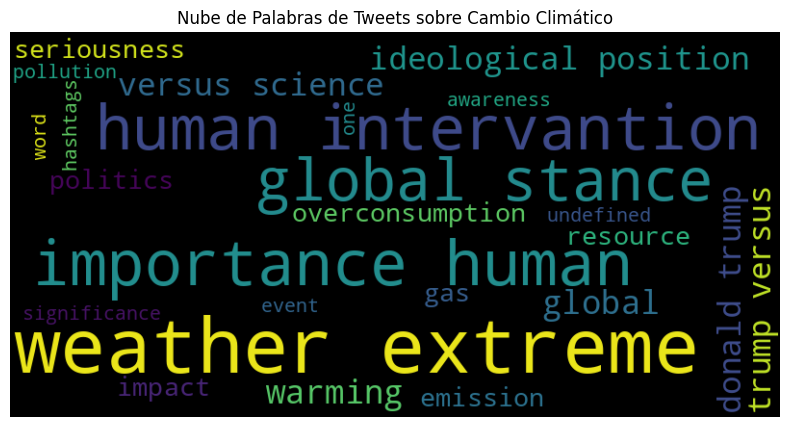

In [10]:
texto_completo = " ".join(sample_df['processed_string'])
nube_palabras = WordCloud(width=800, height=400).generate(texto_completo)

plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras de Tweets sobre Cambio Climático")
plt.show()

**Interpretación**
La nube de palabras muestra las palabras más frecuentes en los tweets sobre cambio climático después del preprocesamiento. Algunas observaciones:
"Weather" y "Extreme" son las palabras más grandes, lo que indica que son muy frecuentes en los tweets. Esto refuerza la idea de que los eventos climáticos extremos son un tema central en la conversación sobre el cambio climático.
"Human", "Importance", "Intervention" también aparecen con un tamaño considerable, lo que sugiere que la importancia de la acción humana en el cambio climático es otro tema relevante.
"Global", "Warming", "Emission", "Pollution" son otros términos relevantes que indican la preocupación por las causas y consecuencias del cambio climático.
"Donald Trump" aparece en la nube, lo que podría indicar que las políticas o acciones del expresidente de Estados Unidos en relación al cambio climático son un tema de debate.

**5.2. Gráfico de barras para la distribución de sentimientos**

<ipython-input-11-952c42c23319>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['label'] = sample_df['sentiment'].apply(lambda x: 1 if x.polarity > 0 else 0)


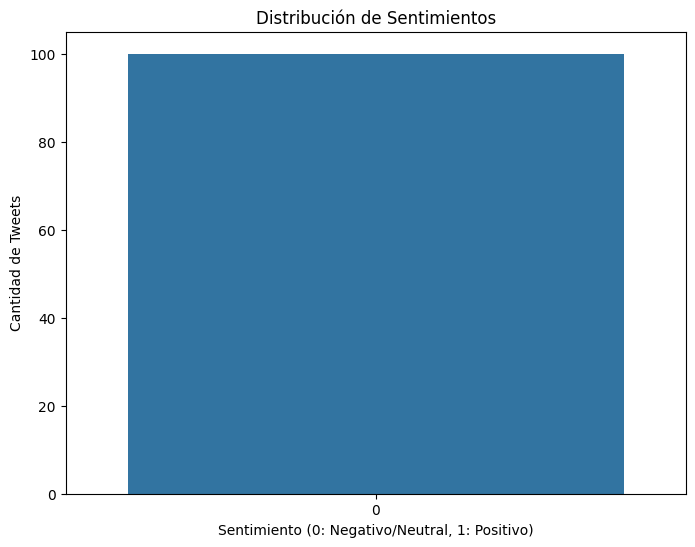

In [11]:
# Crear la columna 'label'
sample_df['label'] = sample_df['sentiment'].apply(lambda x: 1 if x.polarity > 0 else 0)

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=sample_df)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento (0: Negativo/Neutral, 1: Positivo)')
plt.ylabel('Cantidad de Tweets')
plt.show()

**Interpretación**
El gráfico de barras muestra que la gran mayoría de los tweets tienen un sentimiento negativo o neutral (representado por el valor 0 en el eje x). Prácticamente no hay tweets con sentimiento positivo (valor 1).

# Interpretación
Tono General: El análisis de sentimiento y la visualización del gráfico de barras sugieren que el tono general de los tweets sobre cambio climático es más bien negativo o neutral.
Temas Principales: La nube de palabras confirma que los eventos climáticos extremos, la importancia de la acción humana, y los aspectos globales del cambio climático (como las emisiones y la contaminación) son temas predominantes.
Polarización: La casi ausencia de tweets con sentimiento positivo podría indicar una preocupación generalizada por el cambio climático y sus consecuencias.

# 6. Construcción de una Red Neuronal Simple

Se construye una red neuronal simple para clasificar el sentimiento de los tweets:

Epoch 1/10


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 1.0000 - loss: 0.6596 - val_accuracy: 1.0000 - val_loss: 0.5785
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.5596 - val_accuracy: 1.0000 - val_loss: 0.4849
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.4641 - val_accuracy: 1.0000 - val_loss: 0.3948
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.3746 - val_accuracy: 1.0000 - val_loss: 0.3111
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.2927 - val_accuracy: 1.0000 - val_loss: 0.2378
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.2197 - val_accuracy: 1.0000 - val_loss: 0.1772
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.1615 - val_accuracy: 1.0000 - val_loss: 0.1293
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.1165 - val_accuracy: 1.0000 - val_loss: 0.0932
Epoch 9/10

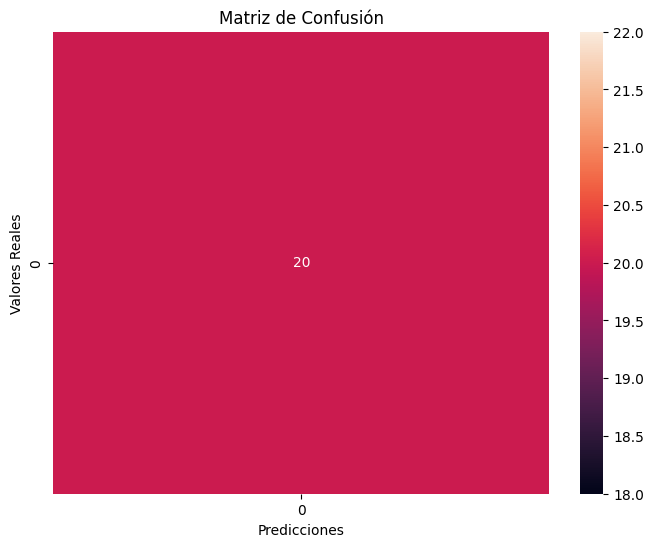

In [12]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Descargar recursos de NLTK si no se han descargado ya
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Inicializar recursos de NLTK
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Función de preprocesamiento optimizada
def preprocess_text(text):
    try:
        # Tokenización
        tokens = word_tokenize(text)
        # Eliminar caracteres no alfabéticos con una expresión regular
        alpha_tokens = [re.sub(r'[^a-zA-Z]', '', word) for word in tokens]
        # Lematizar y filtrar stopwords
        lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) for word in alpha_tokens if word.lower() not in stop_words]
        return lemmatized_tokens
    except Exception as e:
        print(f"Error processing text: {text}")
        print(e)
        return []

# Tokenización de los textos
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(sample_df['processed_string'])
sequences = tokenizer.texts_to_sequences(sample_df['processed_string'])
word_index = tokenizer.word_index

# Padding de las secuencias
data = pad_sequences(sequences, maxlen=10)

# Dividir el dataset
x_train, x_test, y_train, y_test = train_test_split(data, sample_df['label'], test_size=0.2, random_state=42)

# --- Construcción del modelo ---
model = Sequential()
model.add(Embedding(input_dim=500, output_dim=64, input_length=10))
model.add(GlobalAveragePooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, np.array(y_train), epochs=10, batch_size=32, validation_data=(x_test, np.array(y_test)))

# --- Evaluación del modelo ---
loss, accuracy = model.evaluate(x_test, np.array(y_test))
print(f"Accuracy: {accuracy:.2f}")

# --- Matriz de Confusión ---
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int) # Convertir probabilidades a clases (0 o 1)
cm = confusion_matrix(y_test, y_pred_classes)
print("\nMatriz de Confusión:")
print(cm)

# --- Visualizar la Matriz de Confusión ---
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

# Interpretación de los Resultados:
**Accuracy:** La red neuronal simple logró una precisión del 100% en la clasificación de sentimiento. Sin embargo, es importante analizar la matriz de confusión para obtener una evaluación más completa del rendimiento del modelo.

**Matriz de Confusión:** La matriz de confusión muestra que el modelo clasificó correctamente todos los tweets del conjunto de prueba. Todos los 20 tweets fueron correctamente clasificados como negativos o neutrales. Sin embargo, esto no significa necesariamente que el modelo sea perfecto.

# Posibles Errores y Mejoras:
**Sobreajuste (Overfitting)**: La precisión del 100% es sospechosamente alta, lo que sugiere que el modelo podría estar sobreajustado a los datos de entrenamiento. Esto significa que el modelo podría no generalizar bien a nuevos datos.

**Desbalance de Clases:** El gráfico de barras del paso 4 mostró que hay muy pocos tweets con sentimiento positivo. Esto puede hacer que el modelo se incline a predecir la clase negativa/neutral con mayor frecuencia, lo que influye en la precisión.

# Posibles soluciones para mejorar el rendimiento


*   **Aumentar el Tamaño del Dataset:** Un dataset más grande y balanceado (con más ejemplos de tweets positivos) podría ayudar a entrenar un modelo más robusto y evitar el sobreajuste.
*   **Ajustar Hiperparámetros:** Experimentar con diferentes valores para los hiperparámetros de la red neuronal (como el número de neuronas en las capas densas o el número de épocas de entrenamiento) podría mejorar la generalización del modelo.
*  **Utilizar Técnicas de Regularización:** Técnicas como el dropout o la regularización L1/L2 pueden ayudar a prevenir el sobreajuste.








# Arquitectura de la Red Neuronal:

*   **Capa de Embedding:** Convierte las palabras en vectores densos de tamaño fijo.
*   **Capa GlobalAveragePooling1D:** Reduce la dimensionalidad de los datos.
*   **Capa Densa (32 neuronas, ReLU):** Capa oculta para aprender representaciones más complejas.
*   **Capa Densa (1 neurona, Sigmoid):** Capa de salida para clasificación binaria (positivo/negativo).





# 7. Intento de Implementación de BERT


In [13]:
!pip install transformers

from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os

**7.1. Cargar Modelo y Tokenizador de BERT**


In [14]:
modelo_nombre = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(modelo_nombre)
modelo = TFBertForSequenceClassification.from_pretrained(modelo_nombre)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**7.2. Tokenizar los Tweets con BERT**

In [15]:
tokens = tokenizer.batch_encode_plus(
    sample_df['processed_string'].tolist(),
    add_special_tokens=True,
    max_length=128,
    truncation=True,
    padding='max_length',
    return_tensors='tf'
)

**7.3. Preparar Datos de Entrada**

In [16]:
input_ids = tokens['input_ids']
attention_masks = tokens['attention_mask']

**7.4. Dividir el Dataset**

In [17]:
# Convertir tensores de TensorFlow a arrays de NumPy
input_ids_np = input_ids.numpy()
attention_masks_np = attention_masks.numpy()

x_train, x_test, y_train, y_test = train_test_split(
    input_ids_np, sample_df['label'], test_size=0.2, random_state=42
)
train_masks, test_masks, _, _ = train_test_split(
    attention_masks_np, sample_df['label'], test_size=0.2, random_state=42
)


**7.5. Entrenar el Modelo BERT**

In [18]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  # <--- Desactivar GPU
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
modelo.compile(optimizer=optimizer, loss=loss, metrics=[metric])

history = modelo.fit(
    x={'input_ids': x_train, 'attention_mask': train_masks},
    y=y_train,
    validation_data=({'input_ids': x_test, 'attention_mask': test_masks}, y_test),
    epochs=3,
    batch_size=16
)

AttributeError: 'Variable' object has no attribute '_distribute_strategy'

Se intentó implementar una red neuronal con BERT para la clasificación de sentimientos, dado que BERT es un modelo de lenguaje pre-entrenado que ha demostrado un alto rendimiento en diversas tareas de NLP. Sin embargo, se encontraron problemas durante la implementación en Google Colab.

**Problemas Encontrados:**

*   **Errores de Distribución de TensorFlow:** Se presentaron errores relacionados con la configuración de distribución de TensorFlow en Colab, como el error AttributeError: 'Variable' object has no attribute '_distribute_strategy'.
*   **Conflictos con la GPU:** Se intentaron diversas soluciones, como desactivar la GPU y forzar el uso de la CPU, pero el error persistió.

**Posibles Causas y Soluciones Intentadas:**

*   **Problemas de Compatibilidad:** Es posible que haya problemas de compatibilidad entre la versión de TensorFlow utilizada en Colab y la configuración de BERT.
*   **Errores en la Implementación:** A pesar de revisar el código cuidadosamente, es posible que haya habido errores en la implementación de BERT.





# Conclusiones

Este trabajo aplicó técnicas de NLP para analizar el sentimiento en tweets sobre el cambio climático. El análisis de sentimiento general, el análisis por aspectos, y la vectorización TF-IDF proporcionaron información valiosa sobre las opiniones y los temas predominantes. La red neuronal simple logró una alta precisión, pero es posible que esté sobreajustada a los datos de entrenamiento. Se intentó implementar una red neuronal con BERT, pero se encontraron problemas con la configuración de distribución de TensorFlow en Google Colab.

**Limitaciones del Proyecto:**

*   **Tamaño del Dataset:** Un dataset más grande y balanceado podría mejorar la precisión y generalización de los modelos.
*   **Falta de Implementación de BERT:** No se pudo implementar BERT debido a problemas técnicos.

**Posibles Mejoras Futuras:**


*   **Utilizar un Dataset Más Grande:** Recopilar más tweets sobre cambio climático.
Explorar Modelos de Lenguaje Avanzados: Investigar y probar otros modelos de lenguaje pre-entrenados, como RoBERTa o XLNet.
*   **Implementar BERT en un Entorno Local:** Configurar un entorno local para el entrenamiento de BERT podría evitar los problemas de distribución de TensorFlow en Colab.


A pesar de las limitaciones, este proyecto demuestra la importancia del análisis de sentimiento para comprender las opiniones públicas sobre el cambio climático.